<a href="https://colab.research.google.com/github/atilamahnesaii/machine-learning-algorithms/blob/main/machine_learning_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Libraries

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as plt

acc_train:96.46017699115043 acc_test :90.35087719298247	  ,6.109299798167967 
 pr_train:91.78082191780823 re_test: 93.05555555555556 
acc_train:99.11504424778761 acc_test :90.35087719298247	  ,8.764167054805142 
 pr_train:91.78082191780823 re_test: 93.05555555555556 
acc_train:100.0 acc_test :95.6140350877193	  ,4.3859649122806985 
 pr_train:97.1830985915493 re_test: 95.83333333333334 
acc_train:100.0 acc_test :96.49122807017544	  ,3.5087719298245617 
 pr_train:95.94594594594594 re_test: 98.61111111111111 
acc_train:100.0 acc_test :94.73684210526315	  ,5.26315789473685 
 pr_train:92.3076923076923 re_test: 100.0 
acc_train:95.57522123893806 acc_test :92.98245614035088	  ,2.5927650985871793 
 pr_train:90.0 re_test: 100.0 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


acc_train:100.0 acc_test :97.36842105263158	  ,2.631578947368425 
 pr_train:98.59154929577466 re_test: 97.22222222222221 


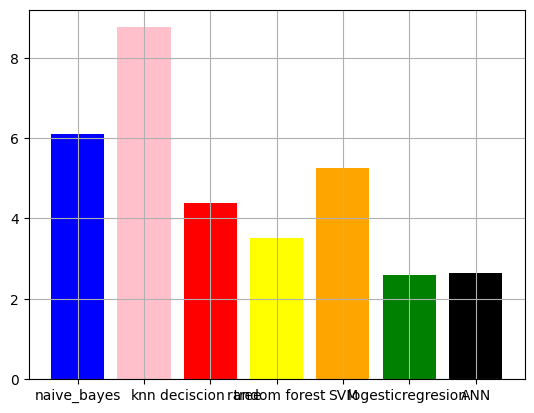

In [2]:

cn=load_breast_cancer()


# print(cn.DESCR)
#DESCR==>
# topic:: References

#    - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction
#      for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on
#      Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
#      San Jose, CA, 1993.
#    - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and
#      prognosis via linear programming. Operations Research, 43(4), pages 570-577,
#      July-August 1995.
#    - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
#      to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994)
#      163-171.

#dataset.info
bc=cn.target[0]

# print(bc,cn.target.shape,'\n    :',cn.data[500],'\n \n ',cn.data.shape)

#   #preprocessing
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test=train_test_split(cn.data,cn.target,test_size=0.2,train_size=0.2)

# print(f' \n x: feature test {x_test.shape} train {x_train.shape} \n y: label test {y_test.shape} train  {y_train.shape}')


from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler: Transform features by scaling each feature to a given range.

# This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

# The transformation is given by:

#     X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#     X_scaled = X_std * (max - min) + min
# where min, max = feature_range.

# This transformation is often used as an alternative to zero mean, unit variance scaling.
scaler=MinMaxScaler(feature_range=(0,1))
#کمترین و بیشترین رو پیدا کرده و این ویزگی رو برای تمامی افراد ر. و پیدا کرده .  و نسبت به ویزگی های هم مرتبه مقایسه می کند مساحت نسبت یه مساحت مثلا
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
# print(x_test[0])
#performance metrics
from sklearn.metrics import recall_score,accuracy_score,precision_score,confusion_matrix

def culcate (y_train,y_test,y_pred_train,y_pred_test):
    acc_train=accuracy_score(y_true=y_train,y_pred=y_pred_train)*100 #deqhat
    acc_test=accuracy_score(y_true=y_test,y_pred=y_pred_test)*100 #deqhat

    pr_train=precision_score(y_true=y_test,y_pred=y_pred_test)*100 #agar + bashe vaqhan che qadar+
    pr_test=precision_score(y_true=y_train,y_pred=y_pred_train)*100 #agar + bashe vaqhan che qadar+
    re_train=recall_score(y_true=y_train,y_pred=y_pred_train)*100 #agar + bashe che qhadr drost tashis dadim
    re_test=recall_score(y_true=y_test,y_pred=y_pred_test)*100 #agar + bashe che qhadr drost tashis dadim
    print(f"acc_train:{acc_train} acc_test :{acc_test}\t  ,{acc_train-acc_test} \n pr_train:{pr_train} re_test: {re_test} ")
    return acc_test ,acc_train ,pr_train,re_test
#classification

#naive_bayes

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB().fit(x_train,y_train)
y_pred_train=gnb.predict(x_train)
y_pred_test=gnb.predict(x_test)

acc_test_gnp ,acc_train_gnp ,pr_train_gnp,re_test_gnp=culcate(y_train,y_test,y_pred_train,y_pred_test)

#2 KNN
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=8,algorithm="kd_tree",leaf_size=28).fit(x_train,y_train)

y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)

acc_test_knn,acc_train_knn ,pr_train_knn,re_test_knn=culcate(y_train,y_test,y_pred_train,y_pred_test)
    # n_neighbors: Int = 5,
    # weights: ((...) -> Unknown) | Literal['uniform', 'distance'] | None = "uniform",
    # algorithm: Literal['auto', 'ball_tree', 'kd_tree', 'brute'] = "auto",
    # leaf_size: Int = 30,
    # p: Int = 2,
    # metric: str | ((...) -> Unknown) = "minkowski",
    # metric_params: dict[Unknown, Unknown] | None = None,
    # n_jobs: Int | None = None
#deciscion  tree
from sklearn.tree import DecisionTreeClassifier

tr=DecisionTreeClassifier(max_depth=64,min_samples_split=2,criterion="entropy").fit(x_train,y_train)
    # criterion: Literal['gini', 'entropy', 'log_loss'] = "gini",
    # splitter: Literal['best', 'random'] = "best",
    # max_depth: Int | None = None,
    # min_samples_split: float | int = 2,
    # min_samples_leaf: float | int = 1,
    # min_weight_fraction_leaf: Float = 0,
    # max_features: float | int | Literal['auto', 'sqrt', 'log2'] | None = None,
    # random_state: Int | RandomState | None = None,
    # max_leaf_nodes: Int | None = None,
    # min_impurity_decrease: Float = 0,
    # class_weight: Mapping[Unknown, Unknown] | str | Sequence[Mapping[Unknown,

y_pred_train=tr.predict(x_train)
y_pred_test=tr.predict(x_test)

acc_test_tr,acc_train_tr ,pr_train_tr,re_test_tr=culcate(y_train,y_test,y_pred_train,y_pred_test)

#random dorest
from sklearn.ensemble import RandomForestClassifier
ra=RandomForestClassifier(n_estimators=1000,max_depth=32,min_samples_split=4).fit(x_train,y_train)

    # n_estimators: Int = 100,
    # criterion: Literal['gini', 'entropy', 'log_loss'] = "gini",
    # max_depth: Int | None = None,
    # min_samples_split: float | int = 2,
    # min_samples_leaf: float | int = 1,
    # min_weight_fraction_leaf: Float = 0,
    # max_features: float | int | Literal['sqrt', 'log2'] = "sqrt",
    # max_leaf_nodes: Int | None = None,
    # min_impurity_decrease: Float = 0,
    # bootstrap: bool = True,
    # oob_score: bool = False,
    # n_jobs: Int | None = None,
    # random_state: Int | RandomState | None = None,
    # verbose: Int = 0,
    # warm_start: bool = False,
    # class_weight: Mapping[Unknown, Unknown] | Sequence[Mapping[Unknown, Unknown]] | Literal['balanced', 'balanced_subsample'] | None = None,
    # ccp_alpha: float = 0,
    # max_samples: float | int | None = None
y_pred_train=ra.predict(x_train)
y_pred_test=ra.predict(x_test)

acc_test_ra,acc_train_ra ,pr_train_ra,re_test_ra=culcate(y_train,y_test,y_pred_train,y_pred_test)

#svm
from sklearn.svm import SVC
sv=SVC(kernel="poly").fit(x_train,y_train)

    # C: Float = 1,
    # kernel: ((...) -> Unknown) | Literal['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'] = "rbf",
    # degree: Int = 3,
    # gamma: float | Literal['scale', 'auto'] = "scale",
    # coef0: Float = 0,
    # shrinking: bool = True,
    # probability: bool = False,
    # tol: Float = 0.001,
    # cache_size: Float = 200,
    # class_weight: Mapping[Unknown, Unknown] | str | None = None,
    # verbose: bool = False,
    # max_iter: Int = ...,
    # decision_function_shape: Literal['ovo', 'ovr'] = "ovr",
    # break_ties: bool = False,
    # random_state: Int | RandomState | None = None
y_pred_train=sv.predict(x_train)
y_pred_test=sv.predict(x_test)

acc_test_sv,acc_train_sv ,pr_train_sv,re_test_sv=culcate(y_train,y_test,y_pred_train,y_pred_test)


# logesticregresion
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression().fit(x_train,y_train)
    # penalty: Literal['l1', 'l2', 'elasticnet'] | None = "l2",
    # *,
    # dual: bool = False,
    # tol: Float = 0.0001,
    # C: Float = 1,
    # fit_intercept: bool = True,
    # intercept_scaling: Float = 1,
    # class_weight: Mapping[Unknown, Unknown] | str | None = None,
    # random_state: Int | RandomState | None = None,
    # solver: Literal['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] = "lbfgs",
    # max_iter: Int = 100,
    # multi_class: Literal['auto', 'ovr', 'multinomial'] = "auto",
    # verbose: Int = 0,
    # warm_start: bool = False,
    # n_jobs: Int | None = None,
    # l1_ratio: Float | None = None
y_pred_train=lg.predict(x_train)
y_pred_test=lg.predict(x_test)

acc_test_lg,acc_train_lg ,pr_train_lg,re_test_lg=culcate(y_train,y_test,y_pred_train,y_pred_test)

#ANN
from sklearn.neural_network import MLPClassifier
an=MLPClassifier(hidden_layer_sizes=256,activation="relu",solver='adam',batch_size=64).fit(x_train,y_train)
#     hidden_layer_sizes: ArrayLike | tuple[int] = ...,
#     activation: Literal['relu', 'identity', 'logistic', 'tanh'] = "relu",
#     *,
#     solver: Literal['lbfgs', 'sgd', 'adam'] = "adam",
#     alpha: Float = 0.0001,
#     batch_size: Int | str = "auto",
#     learning_rate: Literal['constant', 'invscaling', 'adaptive'] = "constant",
#     learning_rate_init: Float = 0.001,
#     power_t: Float = 0.5,
#     max_iter: Int = 200,
#     shuffle: bool = True,
#     random_state: Int | RandomState | None = None,
#     tol: Float = 0.0001,
#     verbose: bool = False,
#     warm_start: bool = False,
#     momentum: Float = 0.9,
#     nesterovs_momentum: bool = True,
#     early_stopping: bool = False,
#     validation_fraction: Float = 0.1,
#     beta_1: Float = 0.9,
#     beta_2: Float = 0.999,
#     epsilon: Float = 1e-8,
#     n_iter_no_change: Int = 10,
#     max_fun: Int = 15000
y_pred_train=an.predict(x_train)
y_pred_test=an.predict(x_test)

acc_test_an,acc_train_an ,pr_train_an,re_test_an=culcate(y_train,y_test,y_pred_train,y_pred_test)

#comparison
import matplotlib.pyplot as plt

# acc_train=[acc_train_gnp,acc_train_knn,acc_train_tr,acc_train_ra,acc_train_sv,acc_test_lg,acc_test_an]
# title=["naive_bayes",  "knn",  "deciscion  tree","random forest","SVM","logesticregresion ","ANN"]
# colore=['blue','pink','red','yellow','orange','green','black']
# plt.bar(title,acc_train,color=colore)
# plt.grid()
# plt.show()

# acc_test=[acc_test_gnp,acc_test_knn,acc_test_tr,acc_test_ra,acc_test_sv,acc_test_lg,acc_test_an]
# title=["naive_bayes",  "knn",  "deciscion  tree","random forest","SVM","logesticregresion ","ANN"]
# colore=['blue','pink','red','yellow','orange','green','black']
# plt.bar(title,acc_test,color=colore)
# plt.grid()
# plt.show()

acc_tr=[(acc_train_gnp-acc_test_gnp),(acc_train_knn -acc_test_knn),(acc_train_tr - acc_test_tr)
          ,(acc_train_ra - acc_test_ra),(acc_train_sv - acc_test_sv),(acc_train_lg - acc_test_lg),(acc_train_an - acc_test_an)]
title=["naive_bayes",  "knn",  "deciscion  tree","random forest","SVM","logesticregresion ","ANN"]
colore=['blue','pink','red','yellow','orange','green','black']
# plt.stackplot(title,acc_tr,color=colore)
# plt.stem(title,acc_tr)
plt.bar(title,acc_tr,color=colore)
plt.grid()
plt.show()
